# AI Growth, Adoption, and Labor Market Impact
A Multi-level Analysis using Python, Pandas, NumPy, and Matplotlib.
## 1. Project Objectives
1. Investigate global AI market growth and adoption trends.
2. Explore job-level impact of AI: automation risk, salary, and future growth.

Datasets Used: 

The Rise of Artificial Intelligence (CSV): Global indicators such as software revenue, market value, AI adoption, job creation and loss (2018–2022). 

https://www.kaggle.com/datasets/muhammadroshaanriaz/the-rise-of-artificial-intelligence 

Analysis of AI Adoption and Automation Risk (CSV): Job-level data including AI adoption score, automation risk, salaries, and growth projections. 

https://www.kaggle.com/datasets/martnpereira/ai-adoption-and-automation-risk-san-francisco-ca 

 

 

Research Questions: 

How has the AI market grown over time in terms of revenue and adoption? 

Which jobs are most exposed to automation, and how does AI adoption relate to salary or projected job growth? 

## 2. Preparations

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### 2.1 Load the data

In [81]:
df_global = pd.read_csv('/global_ai_rise.csv')
df_jobs = pd.read_csv('/ai_automation_risk.csv')


### 2.2 Clean percentage columns in global data

In [82]:
df_global_clean = df_global.copy()
percent_cols = [col for col in df_global_clean.columns if df_global_clean[col].dtype == 'object' and df_global_clean[col].str.contains('%').any()]
for col in percent_cols:
    df_global_clean[col] = df_global_clean[col].str.rstrip('%').str.strip().replace('', np.nan).astype(float)

### 2.3 Clean job-level data

In [83]:
df_jobs_clean = df_jobs.copy()
df_jobs_clean['Salary (USD)'] = df_jobs_clean['Salary (USD)'].replace(r'[\$,]', '', regex=True).astype(float)
df_jobs_clean['AI Adoption Score'] = pd.to_numeric(df_jobs_clean['AI Adoption Score'], errors='coerce')
df_jobs_clean['Automation Risk Score'] = pd.to_numeric(df_jobs_clean['Automation Risk Score'], errors='coerce')
df_jobs_clean['Job Growth Score'] = pd.to_numeric(df_jobs_clean['Job Growth Score'], errors='coerce')

## 3. Visualizations

### 3.1 In OOP

In [88]:
class PlotBuilder:
    def __init__(self, df_global):
        self.df = df_global

    def adoption_over_time(self):
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(self.df['Year'], self.df['AI Adoption (%)'], marker='o', color='darkblue')
        ax.set_title("AI Adoption Over Time")
        ax.set_xlabel("Year")
        ax.set_ylabel("Adoption (%)")
        ax.grid(True)
        plt.tight_layout()
        plt.show()

    def market_vs_revenue(self):
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(self.df['Year'], self.df['AI Software Revenue(in Billions)'], label='Software Revenue', marker='o')
        ax.plot(self.df['Year'], self.df['Global AI Market Value(in Billions)'], label='Market Value', marker='x')
        ax.set_title("AI Market Value vs Software Revenue")
        ax.set_xlabel("Year")
        ax.set_ylabel("Billions USD")
        ax.legend()
        ax.grid(True)
        plt.tight_layout()
        plt.show()

    def jobs_created_vs_eliminated(self):
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.bar(self.df['Year'] - 0.15, self.df['Estimated Jobs Eliminated by AI (millions)'],
               width=0.3, label='Jobs Eliminated', color='salmon')
        ax.bar(self.df['Year'] + 0.15, self.df['Estimated New Jobs Created by AI (millions)'],
               width=0.3, label='Jobs Created', color='seagreen')
        ax.set_title("Jobs Created vs Eliminated by AI")
        ax.set_xlabel("Year")
        ax.set_ylabel("Jobs (%)")
        ax.legend()
        plt.tight_layout()
        plt.show()

builder = PlotBuilder(df_global_clean)

### 3.1 AI Revenue and Market Value Over Time

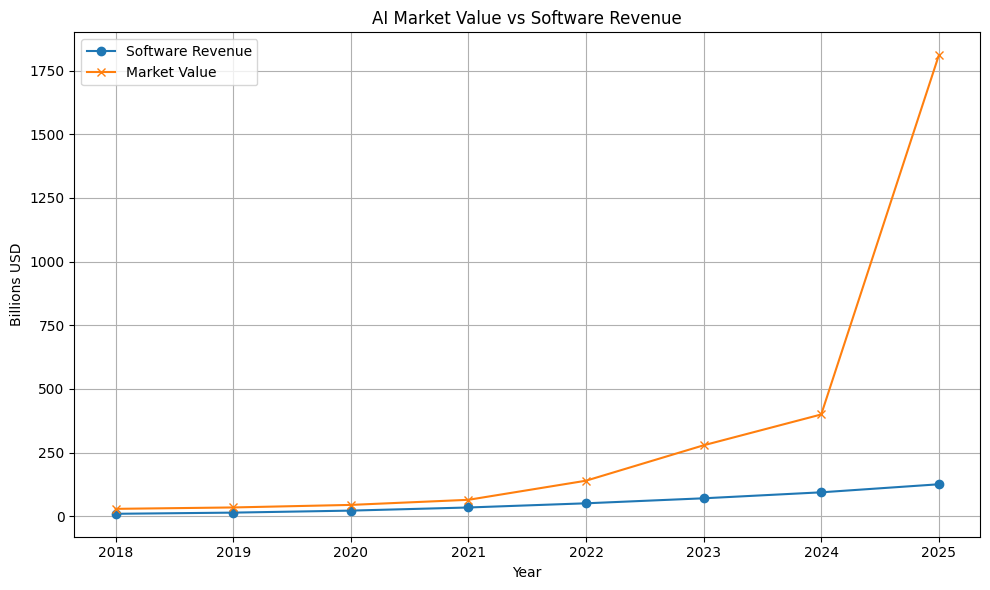

In [99]:
builder.market_vs_revenue()

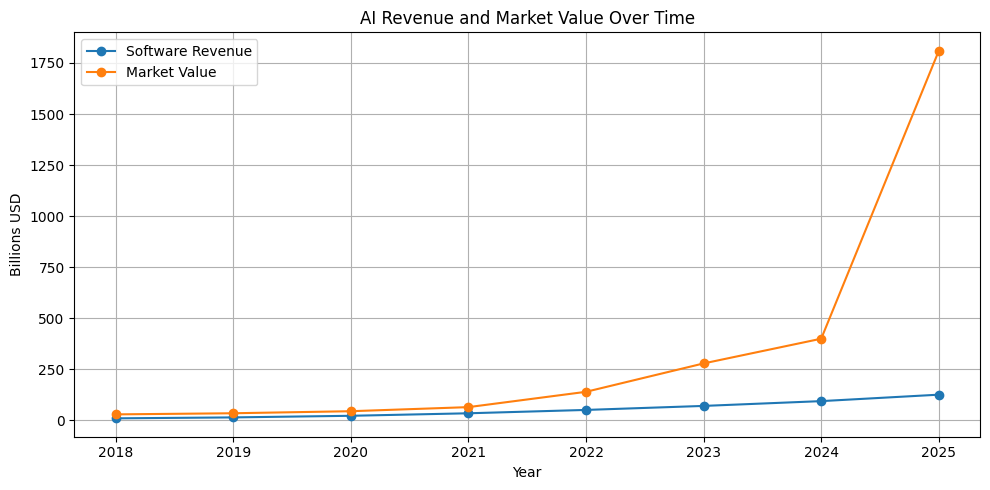

In [92]:
plt.figure(figsize=(10, 5))
plt.plot(df_global_clean['Year'], df_global_clean['AI Software Revenue(in Billions)'], label='Software Revenue', marker='o')
plt.plot(df_global_clean['Year'], df_global_clean['Global AI Market Value(in Billions)'], label='Market Value', marker='o')
plt.title('AI Revenue and Market Value Over Time')
plt.xlabel('Year')
plt.ylabel('Billions USD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.2 AI Adoption Rate Globally

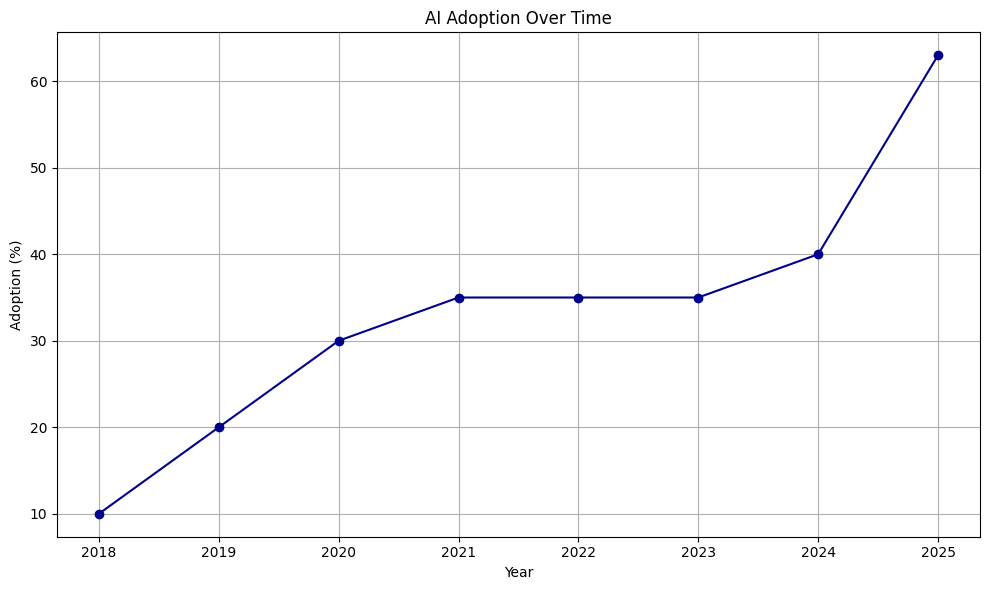

In [100]:
builder.adoption_over_time()

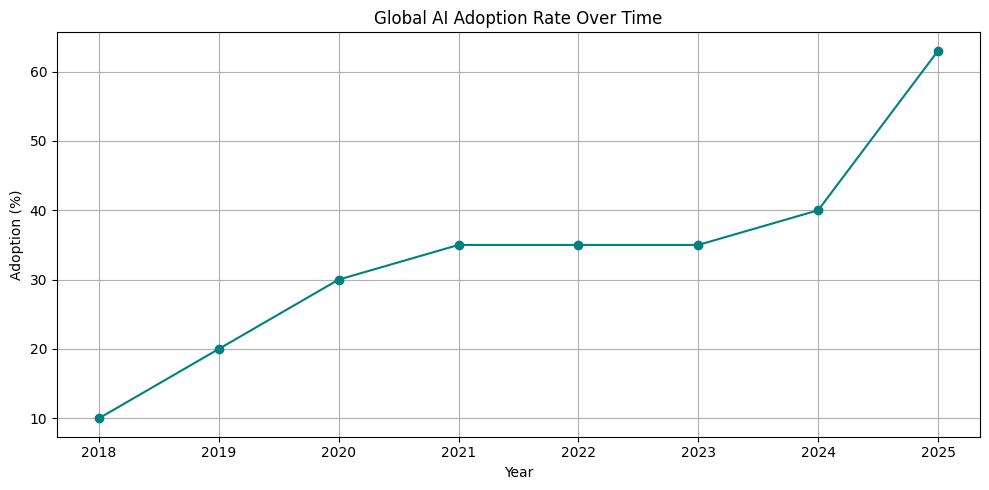

In [77]:
plt.figure(figsize=(10, 5))
plt.plot(df_global_clean['Year'], df_global_clean['AI Adoption (%)'], marker='o', color='teal')
plt.title('Global AI Adoption Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Adoption (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.3 Jobs Created vs Eliminated by AI

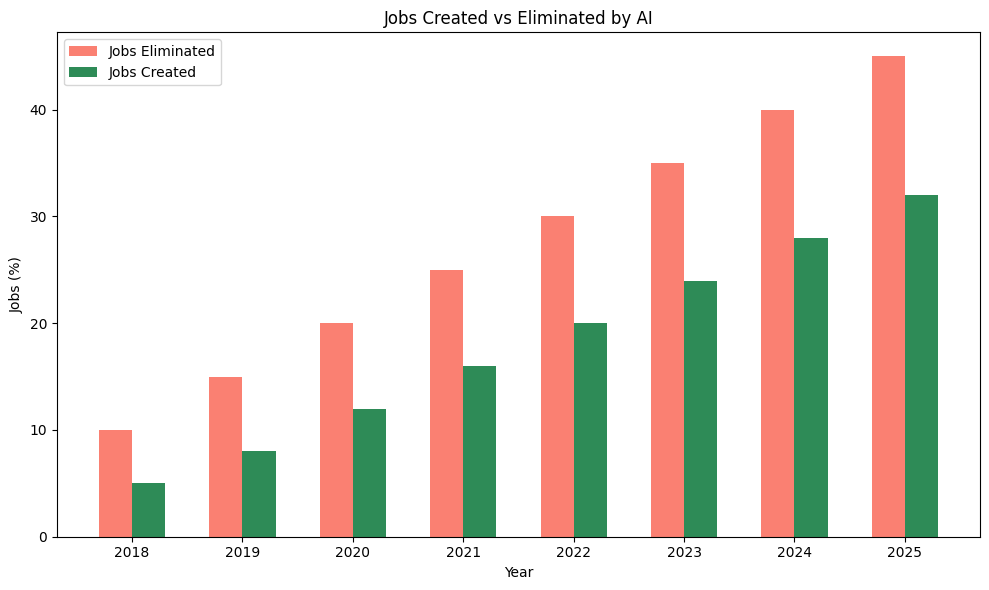

In [93]:
builder.jobs_created_vs_eliminated()

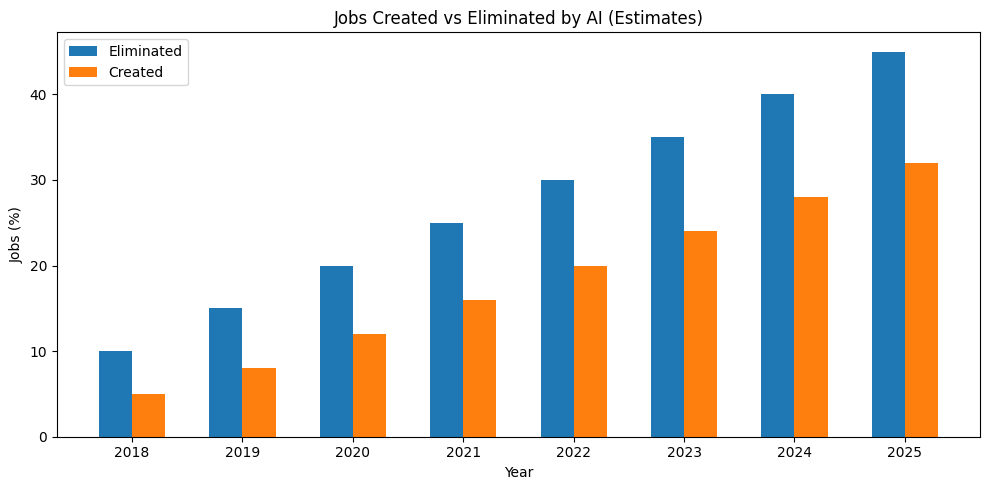

In [78]:
plt.figure(figsize=(10, 5))
plt.bar(df_global_clean['Year'] - 0.15, df_global_clean['Estimated Jobs Eliminated by AI (millions)'], width=0.3, label='Eliminated')
plt.bar(df_global_clean['Year'] + 0.15, df_global_clean['Estimated New Jobs Created by AI (millions)'], width=0.3, label='Created')
plt.title('Jobs Created vs Eliminated by AI (Estimates)')
plt.xlabel('Year')
plt.ylabel('Jobs (%)')
plt.legend()
plt.tight_layout()
plt.show()

### 3.4 Automation Risk by Industry

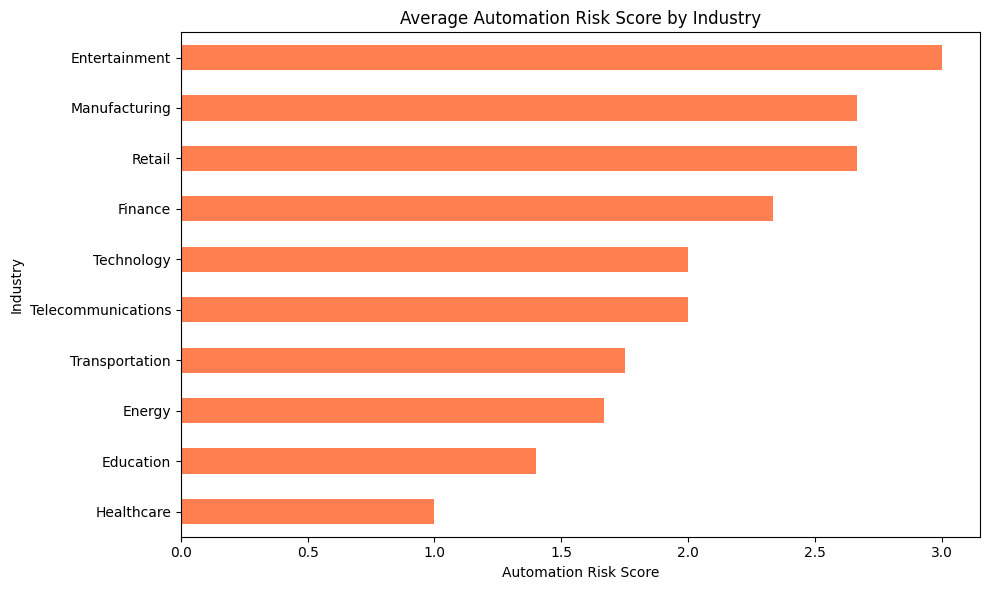

In [98]:
industry_risk = df_jobs_clean.groupby('Industry')['Automation Risk Score'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
industry_risk.plot(kind='barh', color='coral')
plt.title('Average Automation Risk Score by Industry')
plt.xlabel('Automation Risk Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### 3.5 AI Adoption vs Salary (Colored by Growth Score)

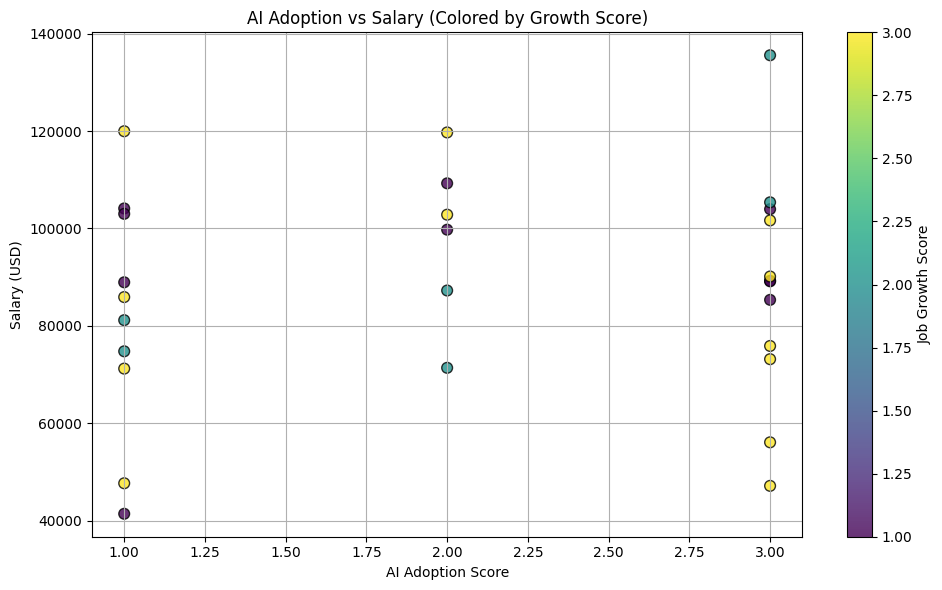

In [80]:
plot_data = df_jobs_clean.dropna(subset=['AI Adoption Score', 'Salary (USD)', 'Job Growth Score'])
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    plot_data['AI Adoption Score'],
    plot_data['Salary (USD)'],
    c=plot_data['Job Growth Score'],
    cmap='viridis',
    s=60,
    edgecolor='black',
    alpha=0.8
)
cbar = plt.colorbar(scatter)
cbar.set_label('Job Growth Score')
plt.title('AI Adoption vs Salary (Colored by Growth Score)')
plt.xlabel('AI Adoption Score')
plt.ylabel('Salary (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.6 Year-by-year global trends

In [68]:
from ipywidgets import interact

def show_global_stats(year):
    row = df_global_clean[df_global_clean['Year'] == year].squeeze()
    print(f"📅 Year: {year}")
    print(f"AI Adoption: {row['AI Adoption (%)']}%")
    print(f"Organizations Using AI: {row['Organizations Using AI']}%")
    print(f"Jobs Eliminated: {row['Estimated Jobs Eliminated by AI (millions)']}%")
    print(f"Jobs Created: {row['Estimated New Jobs Created by AI (millions)']}%")
    print(f"Global AI Market Value: ${row['Global AI Market Value(in Billions)']}B")

interact(show_global_stats, year=sorted(df_global_clean['Year'].unique()));

interactive(children=(Dropdown(description='year', options=(np.int64(2018), np.int64(2019), np.int64(2020), np…

### 3.7 Compare different job metrics across industries

In [69]:
def plot_industry_metric(metric):
    avg_values = df_jobs_clean.groupby('Industry')[metric].mean().sort_values()
    plt.figure(figsize=(10, 6))
    avg_values.plot(kind='barh', color='skyblue')
    plt.xlabel(metric)
    plt.title(f'Average {metric} by Industry')
    plt.tight_layout()
    plt.show()

interact(plot_industry_metric, metric=['AI Adoption Score', 'Automation Risk Score', 'Salary (USD)', 'Job Growth Score']);

interactive(children=(Dropdown(description='metric', options=('AI Adoption Score', 'Automation Risk Score', 'S…

### 3.8 Explore individual Job Titles

In [97]:
def explore_job(job_title):
    subset = df_jobs_clean[df_jobs_clean['Job_Title'] == job_title][
        ['Industry', 'AI Adoption Score', 'Automation Risk Score', 'Salary (USD)', 'Job Growth Score']
    ]
    
    if subset.empty:
        print("No data found.")
    else:
        print(f"🔎 {job_title} — Found {len(subset)} entries:")
        display(subset.reset_index(drop=True))

interact(explore_job, job_title=sorted(df_jobs_clean['Job_Title'].unique()));

interactive(children=(Dropdown(description='job_title', options=('AI Researcher', 'Cybersecurity Analyst', 'Da…

In [96]:
from ipywidgets import interact

class JobExplorer:
    def __init__(self, df_jobs):
        self.df = df_jobs

    def list_jobs(self):
        return sorted(self.df['Job_Title'].unique())

    def show_job_variants(self, job_title):
        subset = self.df[self.df['Job_Title'] == job_title][[
            'Industry', 'AI Adoption Score', 'Automation Risk Score', 'Salary (USD)', 'Job Growth Score'
        ]]
        if subset.empty:
            print("No data available for this job title.")
        else:
            print(f"🔍 Job Title: {job_title} — Found {len(subset)} entries:")
            display(subset.reset_index(drop=True))
            
explorer = JobExplorer(df_jobs_clean)

interact(explorer.show_job_variants, job_title=explorer.list_jobs());


interactive(children=(Dropdown(description='job_title', options=('AI Researcher', 'Cybersecurity Analyst', 'Da…

### 3.9 Dynamic selection of data dimensions

In [71]:
def scatter_plot(x_col, y_col):
    plt.figure(figsize=(8, 6))
    plt.scatter(df_jobs_clean[x_col], df_jobs_clean[y_col], alpha=0.7)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} vs {x_col}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

interact(scatter_plot, x_col=['AI Adoption Score', 'Automation Risk Score', 'Salary (USD)'], 
         y_col=['Salary (USD)', 'Job Growth Score', 'Automation Risk Score']);

interactive(children=(Dropdown(description='x_col', options=('AI Adoption Score', 'Automation Risk Score', 'Sa…

## 4. Summary of insights

### 4.1. AI Revenue and Market Value Over Time
Shows exponential growth in both software revenue and market size.

Market value accelerates dramatically post-2022, indicating increasing investment and adoption.

### 4.2. AI Adoption Rate Globally (2018–2025)
Consistent climb from 10% to 63%.

Flattening in 2021–2023 suggests a temporary maturity or transition phase.

A significant jump in 2024–2025 suggests a second wave of mass deployment.

### 4.3. Jobs Created vs. Eliminated by AI
Eliminated jobs consistently outpace created jobs, especially beyond 2021.

Implies net labour market disruption, justifying concern from workers and policymakers.

### 4.4. Automation Risk by Industry
Entertainment, Manufacturing, and Retail are the most automation-prone.

Healthcare, Education, and Energy are relatively safer (possibly due to human-intensive or specialised tasks).

### 4.5. AI Adoption vs Salary (Colored by Growth Score)
Clear clusters suggest:

Higher AI adoption levels don’t always equate to higher salaries.

Job growth scores vary widely across adoption levels — AI investment alone doesn't guarantee demand.

